In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
df = pd.read_csv('/content/drive/MyDrive/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [3]:
Train = df.head(1760)
Test = df.tail(251)

#Splitting Train and Test Data

In [4]:
Train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
1755,2018-12-24,148.149994,151.550003,146.589996,146.830002,143.665421,37169200
1756,2018-12-26,148.300003,157.229996,146.720001,157.169998,153.782547,58582500
1757,2018-12-27,155.839996,156.770004,150.070007,156.149994,152.784531,53117100
1758,2018-12-28,157.500000,158.520004,154.550003,156.229996,152.862808,42291400


In [5]:
Test

,Date,Open,High,Low,Close,Adj Close,Volume
1760,2019-01-02,154.889999,158.850006,154.229996,157.919998,154.516388,37039700
1761,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.125412,91312200
1762,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.064575,58607100
1763,2019-01-07,148.699997,148.830002,145.899994,147.929993,144.741714,54777800
1764,2019-01-08,149.559998,151.820007,148.520004,150.750000,147.500916,41025300
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


#Evaluation Metric MAPE

In [6]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

#Exponential Methods

##Simple Exponential Method

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
ses_model = SimpleExpSmoothing(Train["Close"]).fit(smoothing_level=0.2)
pred_ses_train = ses_model.predict(start = Train.index[0],end = Train.index[-1])
pred_ses_test = ses_model.predict(start = Test.index[0],end = Test.index[-1])
print("Train MAPE :", MAPE(pred_ses_train,Train.Close))
print("Test MAPE :",MAPE(pred_ses_test,Test.Close))

Train MAPE : 2.082837660898289
Test MAPE : 22.575442886058845


In [13]:
rmse_ses_train = sqrt(mean_squared_error(Train.Close, pred_ses_train))
print('Train RMSE: %.3f' % rmse_ses_train)
rmse_ses_test = sqrt(mean_squared_error(Test.Close, pred_ses_test))
print('Test RMSE: %.3f' % rmse_ses_test)

Train RMSE: 3.238
Test RMSE: 60.568


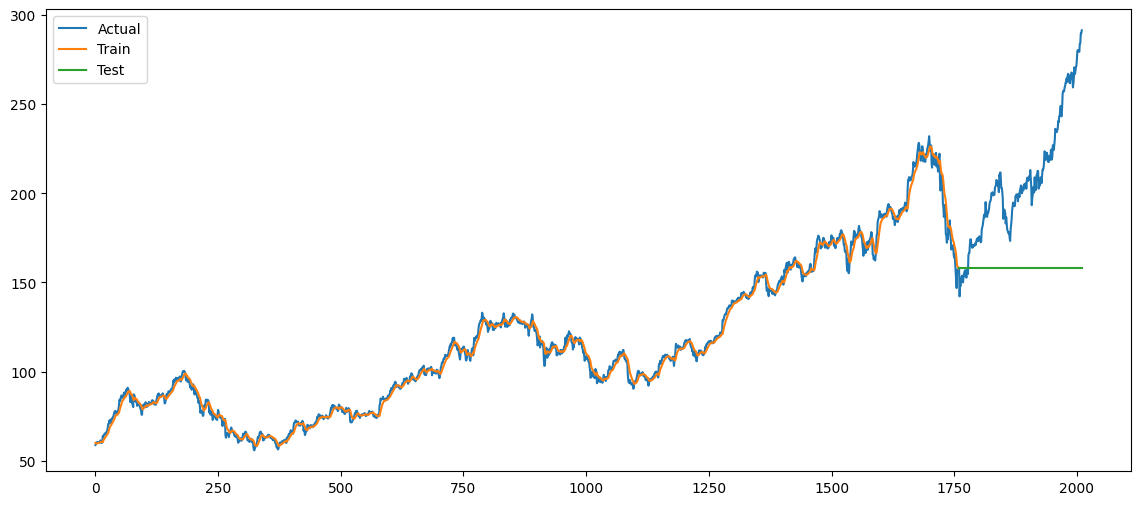

In [15]:
plt.figure(figsize=(14,6))
plt.plot(df.Close,label="Actual")
plt.plot(pred_ses_train, label='Train')
plt.plot(pred_ses_test, label='Test')
plt.legend(loc='best')
plt.show()

#Holt method (Double Exponential)


In [17]:
# Holt method 
hw_model = Holt(Train["Close"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw_train = hw_model.predict(start = Train.index[0],end = Train.index[-1])
pred_hw_test = hw_model.predict(start = Test.index[0],end = Test.index[-1])
print("Train MAPE", MAPE(pred_hw_train,Train.Close))
print("Test MAPE", MAPE(pred_hw_test,Test.Close))

Train MAPE 1.204315796639041
Test MAPE 26.32201339547998


In [18]:
rmse_hw_train = sqrt(mean_squared_error(Train.Close, pred_hw_train))
rmse_hw_test = sqrt(mean_squared_error(Test.Close, pred_hw_test))
print('Train RMSE: %.3f' % rmse_hw_train)
print('Test RMSE: %.3f' % rmse_hw_test)

Train RMSE: 2.032
Test RMSE: 69.995


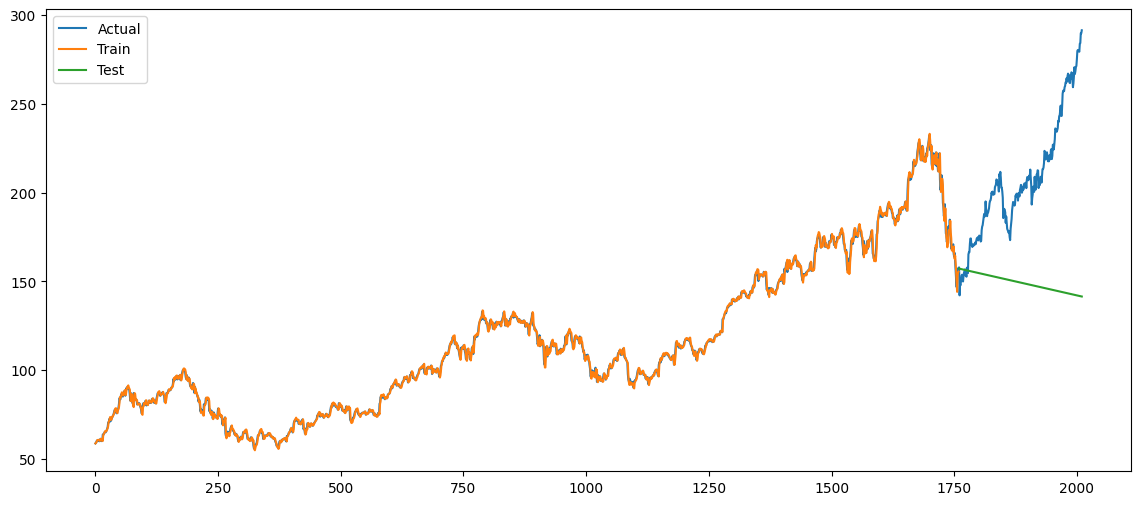

In [19]:
plt.figure(figsize=(14,6))
plt.plot(df.Close,label="Actual")
plt.plot(pred_hw_train, label='Train')
plt.plot(pred_hw_test, label='Test')
plt.legend(loc='best')
plt.show()

#Holts winter exponential smoothing with additive seasonality and additive trend

In [20]:
hwe_model_add_sea = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",seasonal_periods=251).fit()
pred_hwe_add_sea_train = hwe_model_add_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_add_sea_test = hwe_model_add_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_add_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_add_sea_test,Test.Close)) 

MAPE for Train 1.115207152552346
MAPE for Test 16.550756562929575


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [21]:
rmse_hw_add_sea_train = sqrt(mean_squared_error(Train.Close, pred_hwe_add_sea_train))
rmse_hw_add_sea_test = sqrt(mean_squared_error(Test.Close, pred_hwe_add_sea_test))
print('Train RMSE: %.3f' % rmse_hw_add_sea_train)
print('Test RMSE: %.3f' % rmse_hw_add_sea_test)

Train RMSE: 1.783
Test RMSE: 47.021


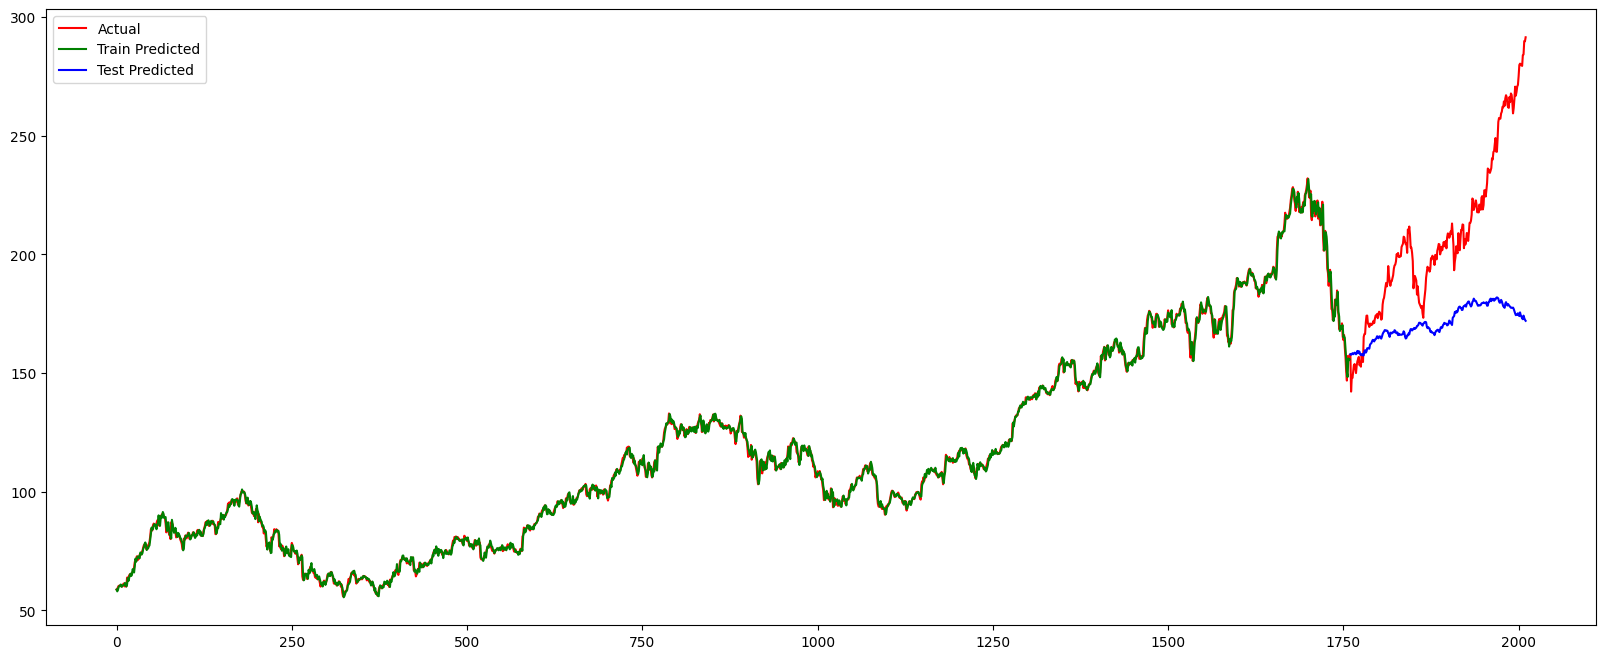

In [22]:
plt.figure(figsize=(20,8))
plt.plot(df.Close, color='red',label='Actual')
plt.plot(pred_hwe_add_sea_train, color='green',label='Train Predicted')
plt.plot(pred_hwe_add_sea_test, color='blue',label='Test Predicted')
plt.legend()
plt.show()

#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [23]:
hwe_model_mul_sea = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=251).fit() 
pred_hwe_mul_sea_train = hwe_model_mul_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_mul_sea_test = hwe_model_mul_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_mul_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_mul_sea_test,Test.Close)) 

MAPE for Train 1.1349788118770827
MAPE for Test 13.161829655853927


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [24]:
rmse_hw_mul_sea_train = sqrt(mean_squared_error(Train.Close, pred_hwe_mul_sea_train))
rmse_hw_mul_sea_test = sqrt(mean_squared_error(Test.Close, pred_hwe_mul_sea_test))
print('Train RMSE: %.3f' % rmse_hw_mul_sea_train)
print('Test RMSE: %.3f' % rmse_hw_mul_sea_test)


Train RMSE: 1.810
Test RMSE: 40.629


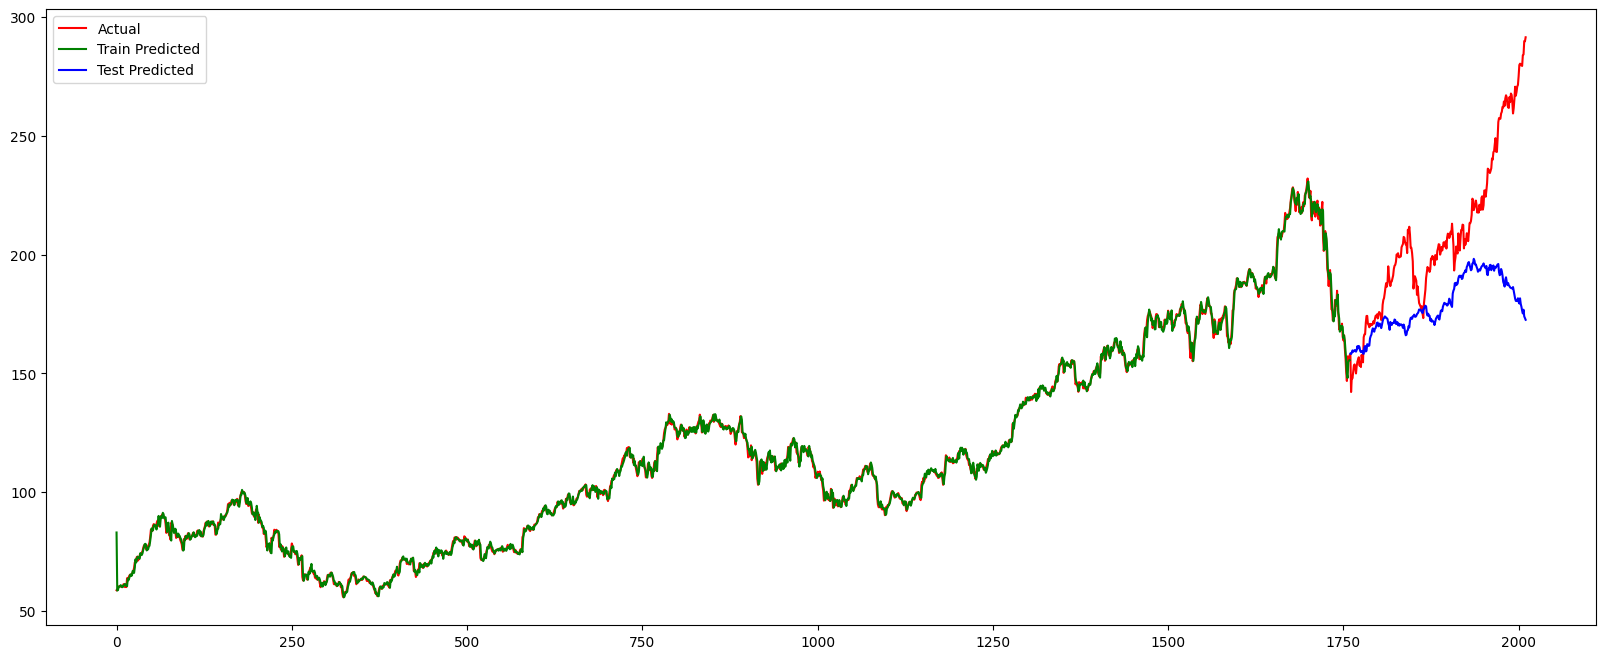

In [26]:
plt.figure(figsize=(20,8))
plt.plot(df.Close, color='red',label='Actual')
plt.plot(pred_hwe_mul_sea_train, color='green',label='Train Predicted')
plt.plot(pred_hwe_mul_sea_test, color='blue',label='Test Predicted')
plt.legend()
plt.show()

#Holts Winter additive Seasonality model combining train and test

In [30]:
final_hwe_model = ExponentialSmoothing(df["Close"],seasonal="add",trend="add",seasonal_periods=251).fit()
final_pred_hwe= final_hwe_model.predict(start = df.index[0],end = df.index[-1])
print("MAPE :",MAPE(final_pred_hwe, df.Close))

MAPE : 1.1296273631120763


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [31]:
rmse_final = sqrt(mean_squared_error(df.Close, final_pred_hwe))
print('RMSE: %.3f' % rmse_final)

RMSE: 2.004


2011    291.860742
2012    289.907233
2013    291.041124
2014    291.548361
2015    291.695969
2016    292.398713
2017    292.994005
2018    292.909497
2019    292.297112
2020    293.263629
2021    294.506878
2022    293.927023
2023    294.969901
2024    294.524670
2025    293.766196
2026    293.608161
2027    294.595217
2028    294.811601
2029    294.184125
2030    295.788356
2031    297.591326
2032    298.163998
2033    298.039513
2034    299.007819
2035    300.369777
2036    300.182418
2037    300.185404
2038    300.135150
2039    301.964144
2040    302.417012
dtype: float64


<Axes: >

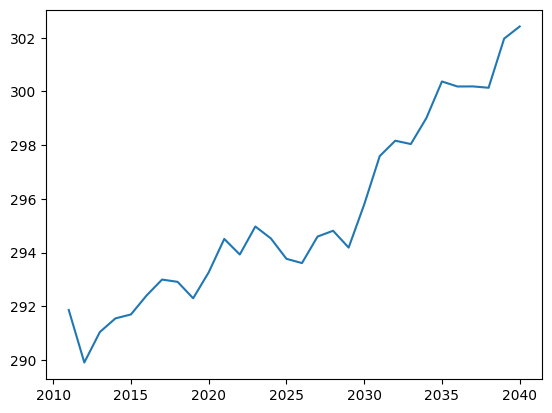

In [33]:
#Forecasting for next 30 time periods
final_forecast=final_hwe_model.forecast(30)
print(final_forecast)
final_forecast.plot()

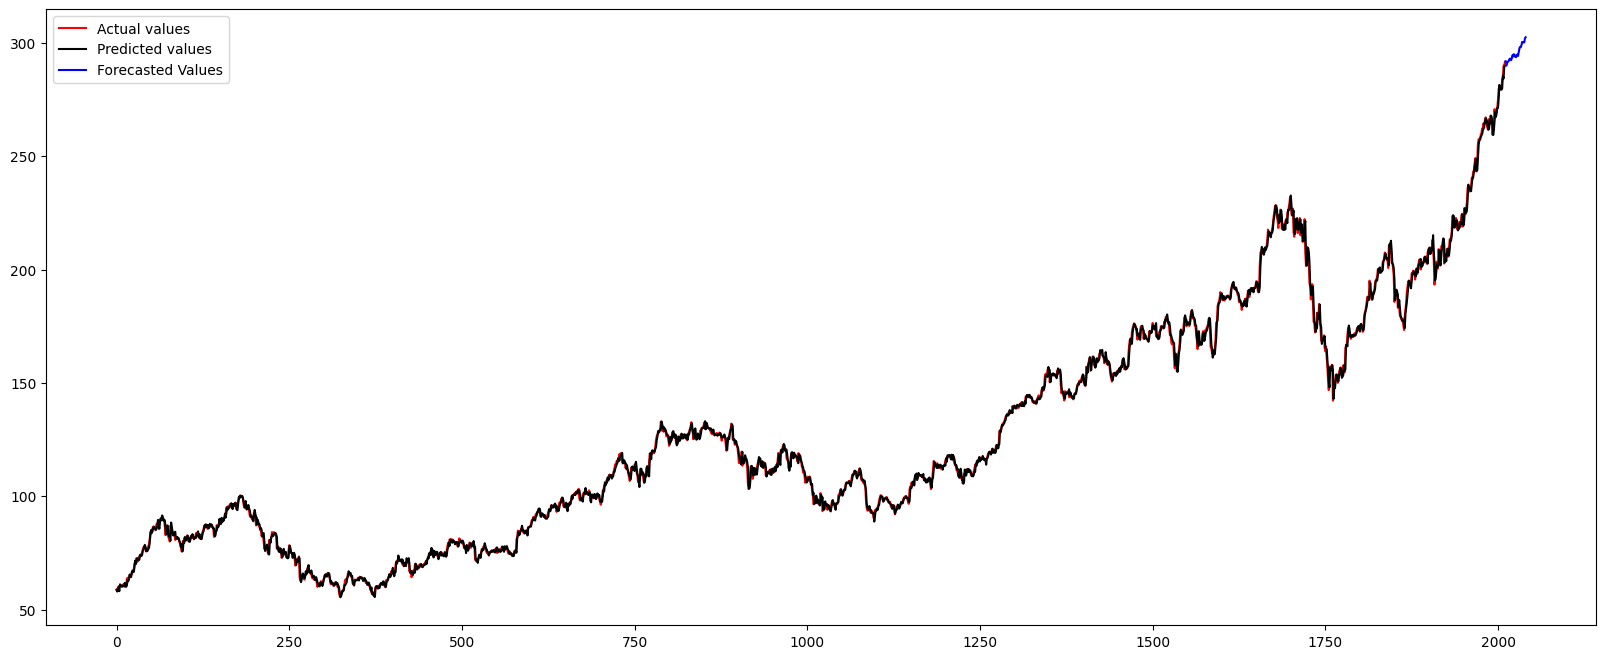

In [34]:
plt.figure(figsize=(20,8))
plt.plot(df.Close, color='red',label='Actual values')
plt.plot(final_pred_hwe, color='black',label='Predicted values')
plt.plot(final_forecast, color='blue',label='Forecasted Values')
plt.legend()
plt.show()